## Ch. 3 - Curve Fitting

__Section 3.1 Least-square fitting methods__

- In Ch. 2, we computed the intercept and slope for the line that minimizes least-squared error for a given set of data $[t_i, y_i], i = 0, 1, \ldots , n-1$

- Problem formulation: overdetermined linear system $Ax=b$
    - $x$ is the array of unknowns {intercept, slope} 
    > This is the reverse order of what we did before, so we'll swap the columns in A from the previous version: <br>1's in the left column and $t_i$ in the right column.
    - The array of measured values appears on the RHS: $b = y_i$

$$\begin{bmatrix}
1 & t_0 \\
1 & t_1 \\
\vdots & \vdots \\
1 & t_{m-1}
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1
\end{bmatrix}
= 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{m-1}
\end{bmatrix}
$$



- Generalizes to higher degree polynomials
    - Row of $A$ holds coefficients of $x: 1, t_i, \ldots, t_1^n$
    - Columns of $A$ hold powers of $t_i$: $A[i,j] = t_i^j$

$$
\begin{aligned}
\begin{bmatrix}
1 & t_0 & t_0^2 \\
1 & t_1 & t_1^2  \\
\vdots & \vdots  & \vdots \\
1 & t_{m-1} & t_{m-1}^2 
\end{bmatrix} 
\begin{bmatrix}
x_0 \\
x_1 \\
x_2
\end{bmatrix}
&= 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{m-1}
\end{bmatrix}
\\
\\
\begin{bmatrix}
1 & t_0 & \cdots & t_0^{n-1} \\
1 & t_1 &  \cdots & t_1^{n-1}  \\
\vdots & \vdots  & \ddots & \vdots \\
1 & t_{m-1} &  \cdots & t_{m-1}^{n-1} 
\end{bmatrix} 
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_{n-1}
\end{bmatrix}
&= 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{m-1}
\end{bmatrix}
\end{aligned}$$

__Solution methods:__

Can multiply by $A^T$ to obtain normal equations $A^T A x = A^T b$
- $A^T A$ is smaller ($n \times n$), square, and symmetric
- But condition number can be squared! (__Bad__ for numerical solution)
- Instead use $QR$ factorization and solve $R x = Q^T b$ by back substitution
    
- Similar approach works for fits to related classes of functions:
    - Exponential: $\{t_i, log(y_i)\}$
    - Power law: $\{log(t_i), log(y_i)\}$
    
So least-squares fitting to polynomials and exponentials has been covered, and we can move on.

#### Section 3.2 - Polynomial Fits and Splines

Interpolation: finding a function that passes through a given set of data points: $r_i = [x_i, y_i,\ldots], i = 0, 1, \ldots , n-1$. 

More general notation  (math/code mash-up) for points in $\Bbb{R}^m$: $r_i = [x[0]_i, x[1]_i,\ldots, x[m-1]_i]$

- Goal: turn discrete data into a continuous function so that values can be estimated between the data points. 
- __Lagrange Interpolation__: simplest version of interpolation
- Things to know about Lagrange interpolation:

1) The basic idea behind how it works.

2) Why you should generally __not__ use it!

Start with minimal case $n=2$ (which is actually VERY useful) in $\Bbb{R}^2$ (to simplify visualization)

Create mathematical description for the curve connection 2 points $r_0 = [x_0, y_0]$ and $r_1 = [x_1, y_1]$

Visualize concrete example: `r0 = [1,2], r1 = [3,6]`

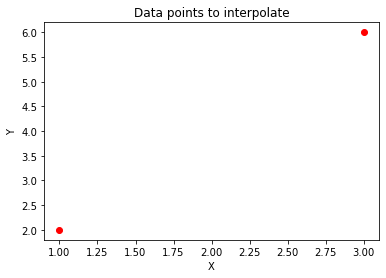

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#define a pair of data points
r0 = np.array([1,2])
r1 = np.array([3,6])
data = np.array([r0, r1]).T #transpose because matplotlib wants separate arrays for each coordinate
plt.plot(data[0],data[1], 'ro') # 'ro' says "mark points with red circles"
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data points to interpolate")
plt.show()

What is the natural way to connect 2 points? Let's see what `matplotlib` thinks...

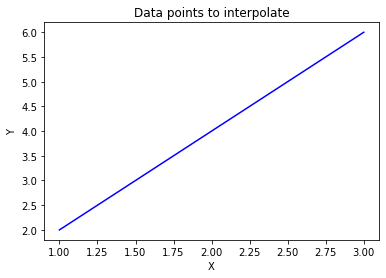

In [2]:
plt.plot(data[0],data[1], 'b-') # 'b-' (which is the default) says connect with blue solid line
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data points to interpolate")
plt.show()

So `matplotlib.pyplot` agrees with the adage "2 points determine a line" (or perhaps a line segment)

Determining how to make the connection brings us to the simplest interpolation: __Parametric Line Segment__

Parametric models introduce an extra variable that supports thinking of interpolation as moving from one point to the next
- Usual parametrization of the line segment
    - Introduce parameter $t \in [0,1]$
    - $r(0) = r_0$ says "At $t=0$, start at $r_0$ "
    - $r(1) = r_1$ says "During 1 unit of time, move from $r_0$ to $r_1$ "
    - Relative displacement: $r_1 - r_0$
    - Typically assume "constant speed" so choose function linear in $t$ (so derivative is constant) <br><br>
- __Parametric line segment formula__: 
$$r(t) = r_0 + t*(r_1 - r_0) \iff r(t) = r0 + t*(r1 - r0)$$
> What is your preferred notation?

- Verify $r(0) = r_0$ and $r(1) = r_0 + 1*(r_1-r_0) \implies r(1) = r_1$


Parametric line segment formula can be regrouped to provide useful alternative perspective:

- Multiply out: $r(t) = r_0 + t*(r_1 - r_0) \implies r(t) = r_0 +t*r_1 - t*r_0$
- Regroup by data point: $$r(t) = (1-t)*r_0 + t*r_1 \iff r(t) = (1-t)*r0 + t*r1$$

__Parametric curve as linear combination__ where each term has:
- input/data/__control point__
- __weighting function__ (that depends on parameter)
$$r(t) = f_0(t)*r_0 + f_1(t)*r_1 \; \text{with} \; f_0(t) = 1 - t; f_1(t) = t$$

Code (defining functions using `lambda` for brevity):
```
pts = np.array([r0, r1])
f0 = lambda t: 1-t # equivalent to def f(t): return 1-t
f1 = lambda t: t   # equivalent to def f(t): return t
weights = lambda t: np.array([f0(t),f1(t)])
r = lambda t: np.dot(pts, weights(t))
```


In [3]:
# python/numpy implementation
pts = np.array([r0, r1]) #define data/control points
f0 = lambda t: 1-t #define weighting functions
f1 = lambda t: t
weights = lambda t: np.array([f0(t),f1(t)])
r = lambda t: np.dot(pts, weights(t)) #interpolant as linear combination of points with weights via np.dot

In [6]:
# test the implementation with sample data points
num_pts = 11
t_vals = np.linspace(0,1,num_pts)
#introduce list comprehension as alternative to for loop
squares = [t**2 for t in range(5)]
print(squares)

[0, 1, 4, 9, 16]


In [5]:
interp_pts = np.array([r(t) for t in t_vals])
coords = np.array([r(t) for t in t_vals])
t_vals, coords.T

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([[1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ],
        [3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]]))

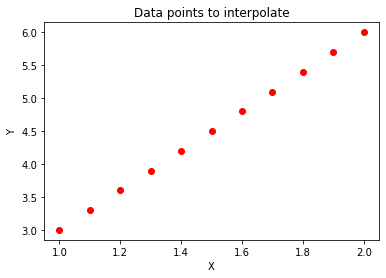

In [6]:
# separate coordinates and plot
x,y = coords.T[0], coords.T[1]
plt.plot(x,y, 'ro')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data points to interpolate")
plt.show()

Extending beyond parametric line segment: 2 distinct paths ahead

- Lagrange interpolation: do the same thing DIRECTLY on larger set of control points
- Bezier curves: do the same ting ITERATIVELY on sets with a few control points

__Lagrange interpolation__

Plot the weighting functions and their sum

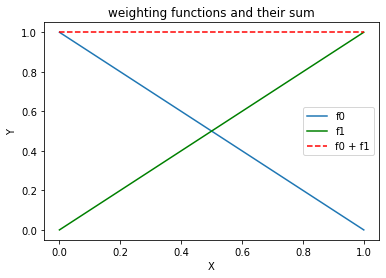

In [7]:
f0_vals = np.array([f0(t) for t in t_vals])
f1_vals = np.array([f1(t) for t in t_vals])
plt.plot(t_vals, f0_vals, label='f0')
plt.plot(t_vals, f1_vals, 'g-', label='f1')
plt.plot(t_vals, f0_vals+f1_vals, 'r--', label='f0 + f1')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("weighting functions and their sum")
plt.show()

Each weight is 1 at the corresponding control point and 0 at other control point(s)
<br>Weights sum to 1 $\iff$ __Partition of unity__

Can we do this with more control points?
- Choose $t \in [0, n-1]$ with control points corresponding to integer values of $t$
- Make weights vanish at control points: construct polynomials with factors $t-i$
- Make $f_i(t)$ not vanish at $i$ by removing the factor $t-i$
- Make $f_i(i) = 1$ by dividing out by remaining factors evaluated at $t=i$

$$f_i(t) = \frac{\prod_{j=0,\neq i}^{n-1} t-j}{\prod_{j=0,\neq i}^{n-1} i-j}$$

In [8]:
# implementation of sample lagrange weigthing functions
def lagwt(i, n, u):
    t = np.linspace(0,1,n)
    w = 1
    for j in range(n):
        if j != i:
            w *= (u-t[j])/(t[i]-t[j])
    return w

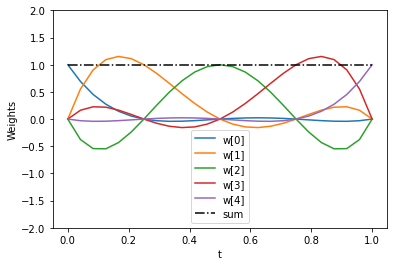

In [9]:
w = np.zeros(shape=[5,25])
u = np.linspace(0,1,25)
for i in range(5):
    for j in range(25):
        w[i,j] = lagwt(i,5,u[j])
plt.plot(u,w[0], label='w[0]')
plt.plot(u,w[1], label='w[1]')
plt.plot(u,w[2], label='w[2]')
plt.plot(u,w[3], label='w[3]')
plt.plot(u,w[4], label='w[4]')
plt.plot(u,w[0]+w[1]+w[2]+w[3]+w[4],'k-.', label='sum')
plt.xlabel('t')
plt.ylabel('w(t)')
plt.ylim(-2,2)
plt.xlabel("t")
plt.ylabel("Weights")
plt.legend()
plt.show()

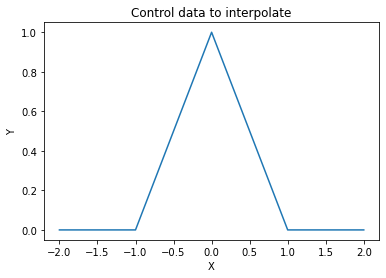

In [10]:
# "hat" function test (discrete delta function)
pts = np.array([ [-2,0],[-1,0],[0,1],[1,0],[2,0] ])
pts = np.transpose(pts)
plt.plot(pts[0],pts[1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Control data to interpolate")
plt.show()

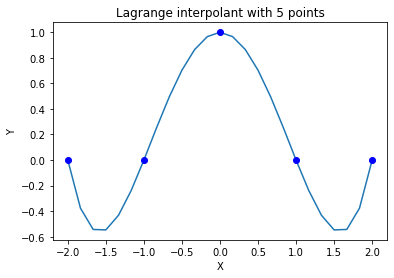

In [11]:
# compute the Lagrange weighing functions for 5 input points.
w = np.zeros(shape=[5,25])
u = np.linspace(0,1,25)
for i in range(5):
    for j in range(25):
        w[i,j] = lagwt(i,5,u[j])

# Multiply the weights times the geometric inputs.
d = np.dot(pts,w)
#plt.plot(d[0],u,'o')
#plt.plot(u,d[1],'x')
plt.plot(d[0],d[1])
new = plt.plot(pts[0],pts[1],'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lagrange interpolant with 5 points")
plt.show(new)

[[-3 -2 -1  0  1  2  3]
 [ 0  0  0  1  0  0  0]]


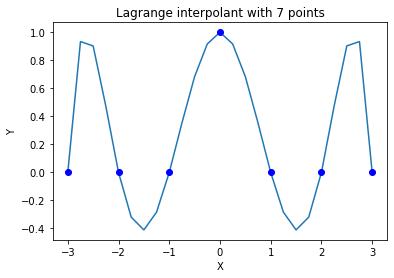

In [12]:
# repeate with 7 points
w = np.zeros(shape=[7,25])
u = np.linspace(0,1,25)
for i in range(7):
    for j in range(25):
        w[i,j] = lagwt(i,7,u[j])
pts = np.array([ [-3,0], [-2,0],[-1,0],[0,1],[1,0],[2,0],[3,0] ])
pts = np.transpose(pts)
print(pts)
d = np.dot(pts,w)
plt.plot(d[0],d[1])
new = plt.plot(pts[0],pts[1],'bo')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lagrange interpolant with 7 points")
plt.show(new)

With Lagrange interpolation:

- More points gives more factors/roots and higher degree polynomial
- More roots gives more oscillation/__ringing__
- Inappropriate for design applications: adding a control point gives __less__ control over what the curve does!

__Bezier Curves (Bernstein polynomials)__



t =  0.4 , x=  0.7999999999999999 , y=  0.64


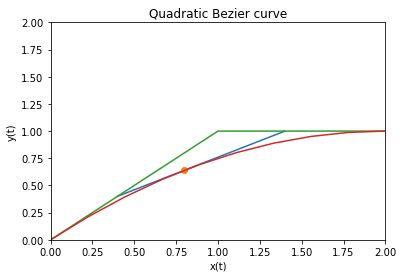

In [13]:
from math import factorial
def lerp(p0,p1,t):
    return (1-t)*p0 + t*p1
def choose(n,j):
    return factorial(n)/(factorial(j)*factorial(n-j))

def bern(j,n,t):
    return choose(n,j)* t**j * (1-t)**(n-j)

# This bezier implementation operates on values for a single coordinate
def bez(coords,t):
    npts = coords.shape[0] # Number of input coordinate values
    deg = npts-1
    val = 0
    for i in range(npts):
        val += bern(i,deg,t)*coords[i]
    return val

xvals = np.array([0,1,2])
yvals = np.array([0,1,1])
t = np.linspace(0,1,10)
bx = np.zeros(10)
by = np.zeros(10)

t0=0.4
for i in range(10):
    bx[i] = bez(xvals,t[i])
    by[i] = bez(yvals,t[i])
    
x01 = lerp(xvals[0], xvals[1],t0)
y01 = lerp(yvals[0], yvals[1],t0)
x12 = lerp(xvals[1], xvals[2],t0)
y12 = lerp(yvals[1], yvals[2],t0)
x012 = lerp(x01,x12,t0)
y012 = lerp(y01,y12,t0)
print('t = ', t0, ', x= ', x012, ', y= ',y012)
plt.axis([0,2,0,2])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Quadratic Bezier curve')
plt.plot([x01,x12], [y01,y12])
plt.plot(x012,y012,'o')
plt.plot(xvals,yvals)
plt.plot(bx,by)
plt.show()

Things to notice:

- 3 control points $\implies$ degree 2 polynomials
- No crazy ringing
- Curve interpolates only the "terminal" control points
- What does the other one do?

- Control points adjacent to terminal points control terminal tangent direction
- Result of Bernstein weights is equivalent to recursive interpolation along parametric line
- This is the sensible parametric line extension for design purposes!

x=  0.7999999999999999 y=  0.64


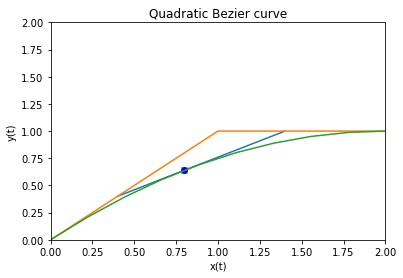

In [14]:
x01 = lerp(xvals[0], xvals[1],t0)
y01 = lerp(yvals[0], yvals[1],t0)
x12 = lerp(xvals[1], xvals[2],t0)
y12 = lerp(yvals[1], yvals[2],t0)
x012 = lerp(x01,x12,t0)
y012 = lerp(y01,y12,t0)
print('x= ', x012, 'y= ',y012)
plt.axis([0,2,0,2])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Quadratic Bezier curve')
plt.plot([x01,x12], [y01,y12])
plt.plot(bez(xvals,t0), bez(yvals,t0),'rx')
plt.plot(x012,y012,'bo')
plt.plot(xvals,yvals)
plt.plot(bx,by)
plt.show()

__Cubic Bezier curve__: 4 control points

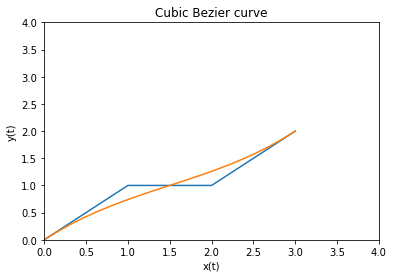

In [15]:
x4 = np.array([0,1,2,3])
y4 = np.array([0,1,1,2])
t4 =np.linspace(0,1,20)
plt.plot(x4,y4)
plt.plot(bez(x4,t4), bez(y4,t4))
plt.axis([0,4,0,4])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Cubic Bezier curve')
plt.show()

What can we say about this curve?
- Interpolated points
- Tangents
- Limits on where the curve can go?

How to deal with more points? Create multiple segments with common control point

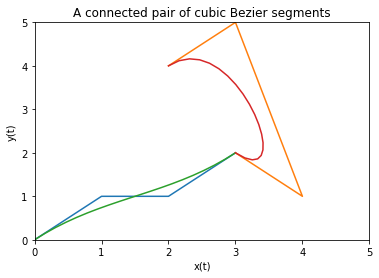

In [16]:
x40 = np.array([0,1,2,3])
y40 = np.array([0,1,1,2])
x41 = np.array([3,4,3,2])
y41 = np.array([2,1,5,4])
t4 =np.linspace(0,1,20)
plt.plot(x40,y40)
plt.plot(x41,y41)
plt.plot(bez(x40,t4), bez(y40,t4))
plt.plot(bez(x41,t4), bez(y41,t4))
plt.axis([0,5,0,5])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('A connected pair of cubic Bezier segments')
plt.show()

What if we need smoother curve with continuous tangent?

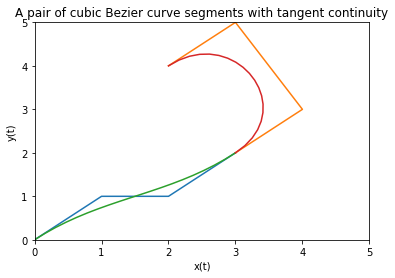

In [17]:
x40 = np.array([0,1,2,3])
y40 = np.array([0,1,1,2])
x41 = np.array([3,4,3,2])
y41 = np.array([2,3,5,4])
t4 =np.linspace(0,1,20)
plt.plot(x40,y40)
plt.plot(x41,y41)
plt.plot(bez(x40,t4), bez(y40,t4))
plt.plot(bez(x41,t4), bez(y41,t4))
plt.axis([0,5,0,5])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('A pair of cubic Bezier curve segments with tangent continuity')
plt.show()

## Section 3.3 - Data Fitting with Python

Read for discussion of python packages for various kinds of curve fits...